1.1. Import Library¶

In [12]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [17]:
# !pip install tensorflow==2.5
# !pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# # gpu 버전이 아닌 경우
# pip install --upgrade tensorflow==버전
# # gpu 버전인 경우
# pip install --upgrade tensorflow-gpu==버전

# # 업그레이드 예시
# pip install --upgrade tensorflow==2.7.0
# # 다운그레이드 예시
# pip install --upgrade tensorflow==1.15.0

1.2. Load Data

In [16]:
train_imgs = np.load('/gdrive/MyDrive/Colab Notebooks/data_files/target_images.npy')
train_labels = np.load('/gdrive/MyDrive/Colab Notebooks/data_files/target_labels.npy')
test_imgs = np.load('/gdrive/MyDrive/Colab Notebooks/data_files/test_images.npy')
test_labels = np.load('/gdrive/MyDrive/Colab Notebooks/data_files/test_labels.npy')

print(train_imgs.shape)
print(train_labels[0]) # one-hot-encoded 5 classes 

# remove one-hot-encoding
train_labels = np.argmax(train_labels, axis = 1)
test_labels = np.argmax(test_labels, axis = 1)

(65, 224, 224, 3)
[1. 0. 0. 0. 0.]


In [18]:
n_train = train_imgs.shape[0]
n_test = test_imgs.shape[0]

# very small dataset
print(n_train)
print(n_test)

65
9


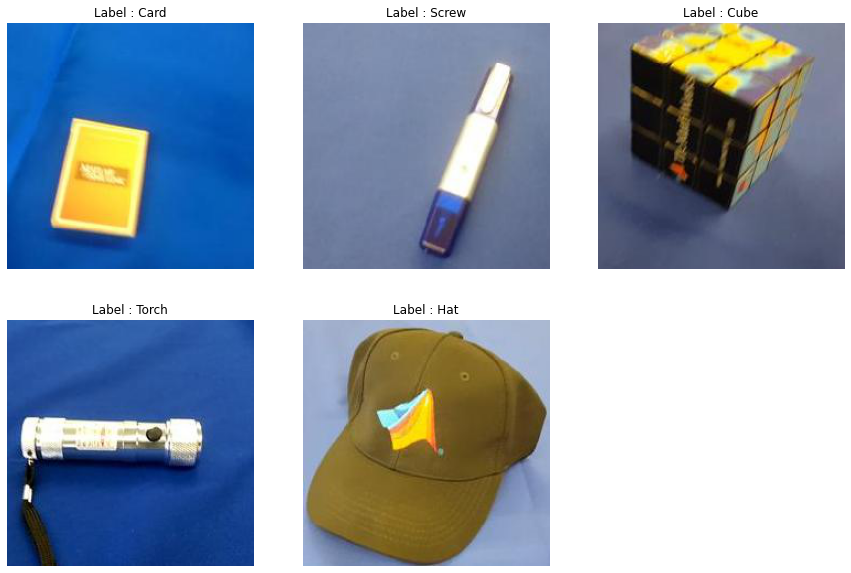

In [19]:
Dict = ['Hat','Cube','Card','Torch','Screw']

plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
plt.imshow(train_imgs[1])
plt.title("Label : {}".format(Dict[train_labels[1]]))
plt.axis('off')
plt.subplot(2,3,2)
plt.imshow(train_imgs[2])
plt.title("Label : {}".format(Dict[train_labels[2]]))
plt.axis('off')
plt.subplot(2,3,3)
plt.imshow(train_imgs[3])
plt.title("Label : {}".format(Dict[train_labels[3]]))
plt.axis('off')
plt.subplot(2,3,4)
plt.imshow(train_imgs[18])
plt.title("Label : {}".format(Dict[train_labels[18]]))
plt.axis('off')
plt.subplot(2,3,5)
plt.imshow(train_imgs[25])
plt.title("Label : {}".format(Dict[train_labels[25]]))
plt.axis('off')
plt.show()


1.3. Load VGG16 Model

In [20]:
model_type = tf.keras.applications.vgg16
base_model = model_type.VGG16()
base_model.trainable = False
base_model.summary()

553467096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

1.4. Testing for Target Data

35363/35363 [==============================] - 0s 0us/step
mosquito_net (2.79%)
toilet_tissue (2.50%)
envelope (1.97%)
Band_Aid (1.55%)
shower_curtain (1.49%)


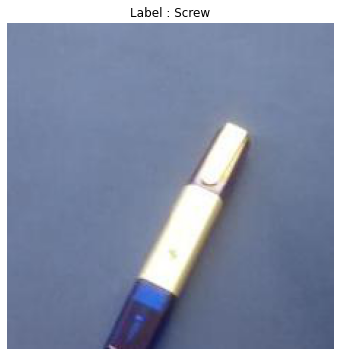

In [21]:
idx = np.random.randint(n_test)
pred = base_model.predict(test_imgs[idx].reshape(-1, 224, 224, 3))
label = model_type.decode_predictions(pred)[0]

print('%s (%.2f%%)' % (label[0][1], label[0][2]*100))
print('%s (%.2f%%)' % (label[1][1], label[1][2]*100))
print('%s (%.2f%%)' % (label[2][1], label[2][2]*100))
print('%s (%.2f%%)' % (label[3][1], label[3][2]*100))
print('%s (%.2f%%)' % (label[4][1], label[4][2]*100))
    
plt.figure(figsize = (6,6))
plt.imshow(test_imgs[idx])
plt.title("Label : {}".format(Dict[test_labels[idx]]))
plt.axis('off')
plt.show()    

2. Learn From Scratchm

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, 
                           kernel_size = (3,3), 
                           activation = 'relu',
                           padding = 'SAME',
                           input_shape = (224, 224, 3)),
    
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64, 
                           kernel_size = (3,3), 
                           activation = 'relu',
                           padding = 'SAME'),
    
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64, 
                           kernel_size = (3,3), 
                           activation = 'relu',
                           padding = 'SAME'),
    
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(filters = 64, 
                           kernel_size = (3,3), 
                           activation = 'relu',
                           padding = 'SAME'),
    
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units = 128, activation = 'relu'),
    
    tf.keras.layers.Dense(units = 5, activation = 'softmax')
])

In [23]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

In [24]:
model.fit(train_imgs, train_labels, batch_size = 10, epochs = 10)

Epoch 1/10
7/7 [==============================] - 7s 837ms/step - loss: 1.7152 - accuracy: 0.1846
Epoch 2/10
7/7 [==============================] - 6s 861ms/step - loss: 1.1574 - accuracy: 0.5692
Epoch 3/10
7/7 [==============================] - 8s 1s/step - loss: 0.7565 - accuracy: 0.6769
Epoch 4/10
7/7 [==============================] - 6s 808ms/step - loss: 0.8966 - accuracy: 0.6615
Epoch 5/10
7/7 [==============================] - 7s 974ms/step - loss: 0.9004 - accuracy: 0.6308
Epoch 6/10
7/7 [==============================] - 6s 863ms/step - loss: 0.5894 - accuracy: 0.8154
Epoch 7/10
7/7 [==============================] - 6s 831ms/step - loss: 0.4204 - accuracy: 0.8769
Epoch 8/10
7/7 [==============================] - 6s 799ms/step - loss: 0.4294 - accuracy: 0.8154
Epoch 9/10
7/7 [==============================] - 6s 844ms/step - loss: 0.2900 - accuracy: 0.8769
Epoch 10/10
7/7 [==============================] - 7s 953ms/step - loss: 0.1955 - accuracy: 0.9538


In [25]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels)

1/1 [==============================] - 1s 636ms/step - loss: 0.1537 - accuracy: 0.8889


In [27]:
# 3. Transfer Learning
# 3.1. Pre-trained Weights, Biases

In [28]:
vgg16_weights = base_model.get_weights()

In [29]:
# 3.2. Build a Transfer Learning Model

In [30]:
# replace new and trainable classifier layer
fc2_layer = base_model.layers[-2].output
output = tf.keras.layers.Dense(units = 5, activation = 'softmax')(fc2_layer)

# define new model
model = tf.keras.Model(inputs = base_model.inputs, outputs = output)

In [31]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [32]:
# 3.3. Define Loss and Optimizer

In [33]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = 'accuracy')

In [34]:
# 3.4. Optimize

In [35]:
model.fit(train_imgs, train_labels, batch_size = 10, epochs = 10)

Epoch 1/10
7/7 [==============================] - 33s 4s/step - loss: 1.8969 - accuracy: 0.2308
Epoch 2/10
7/7 [==============================] - 31s 4s/step - loss: 1.7115 - accuracy: 0.2923
Epoch 3/10
7/7 [==============================] - 33s 5s/step - loss: 1.2042 - accuracy: 0.4154
Epoch 4/10
7/7 [==============================] - 31s 4s/step - loss: 1.0636 - accuracy: 0.4923
Epoch 5/10
7/7 [==============================] - 31s 4s/step - loss: 0.8026 - accuracy: 0.7538
Epoch 6/10
7/7 [==============================] - 31s 4s/step - loss: 0.7005 - accuracy: 0.9385
Epoch 7/10
7/7 [==============================] - 33s 5s/step - loss: 0.5386 - accuracy: 0.9846
Epoch 8/10
7/7 [==============================] - 31s 4s/step - loss: 0.5119 - accuracy: 0.9692
Epoch 9/10
7/7 [==============================] - 31s 4s/step - loss: 0.4606 - accuracy: 0.9692
Epoch 10/10
7/7 [==============================] - 31s 4s/step - loss: 0.3802 - accuracy: 0.9692


In [36]:
# 3.5. Test and Evaluate

In [37]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels)

1/1 [==============================] - 5s 5s/step - loss: 0.2855 - accuracy: 1.0000


1/1 [==============================] - 1s 722ms/step


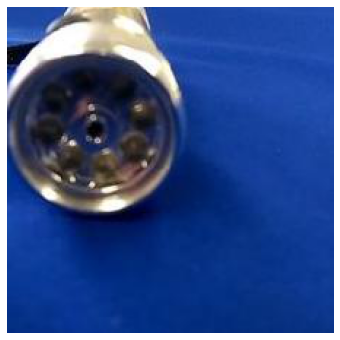

Prediction : Torch


In [38]:
# test_x = random.choice(test_imgs).reshape(-1,224,224,3)
test_x = test_imgs[np.random.choice(n_test, 1)]
pred = np.argmax(model.predict(test_x))

plt.figure(figsize = (6,6))
plt.imshow(test_x.reshape(224, 224, 3))
plt.axis('off')
plt.show()

print('Prediction : {}'.format(Dict[pred]))

In [39]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>